<a href="https://colab.research.google.com/github/AlejandroLLI/TFM/blob/main/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Fin de Master
## Planificación de reincorporación en una empresa
### Alejandro Lopez Lozano
---

## Analisis preliminar y limpieza de datos
Importar librerias

In [ ]:
import pandas as pd
from google.colab import files

import math
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

Cargar datos

In [ ]:
files.upload()

df = pd.read_csv('us_companies_fixed.csv', ';')
df.info()

Saving us_companies_fixed.csv to us_companies_fixed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_name_id      495 non-null    object 
 1   company_name         495 non-null    object 
 2   url                  495 non-null    object 
 3   year_founded         495 non-null    int64  
 4   city                 469 non-null    object 
 5   state                495 non-null    object 
 6   country              495 non-null    object 
 7   zip_code             465 non-null    float64
 8   full_time_employees  495 non-null    object 
 9   Employees Mean       495 non-null    float64
 10  Employees STD        495 non-null    float64
 11  Employees            495 non-null    int64  
 12  Office Size (m2)     487 non-null    float64
 13  Mean sqm per worker  487 non-null    float64
 14  STD sqp per worker   487 non-null 

In [ ]:
df.head(5)

,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,Employees Mean,Employees STD,Employees,Office Size (m2),Mean sqm per worker,STD sqp per worker,Sqm per worker,company_type,company_category,revenue_source,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010,Washington,DC,us,20004.0,01-10,5.5,1.5,8,103.40,12.55,0.62,12.925269,Private,Data/Technology,"Data analysis for clients, Database licensing,...","Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,NaN,NaN,NaN,[],"3 Round Stones is a profitable, self-funded, w...",44:26.0
1,48-factoring-inc,48 Factoring Inc.,https://www.48factoring.com,2014,Philadelphia,PA,us,19087.0,51-200,125.5,24.8,99,2007.06,16.49,2.09,20.273382,Private,Finance & Investment,Financial Services,Business to Business,Small Business Owners,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,11-50,Business,NaN,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN,36:39.9
2,5psolutions,5PSolutions,www.5psolutions.com,2007,Fairfax,VA,us,22003.0,01-10,5.5,1.5,4,56.13,12.55,0.62,14.032197,Private,Data/Technology,"Subscriptions, User fees for web or mobile access","Business to Business, Business to Consumer, Bu...",NaN,"At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.,NaN,NaN,NaN,[],NaN,09:35.5
3,abt-associates,Abt Associates,abtassoc.com,1965,Cambridge,MA,us,2138.0,"1,001-5,000",3000.5,666.5,2102,46844.28,24.86,4.42,22.285578,Private,Research & Consulting,"Data analysis for clients, Database licensing",NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,23:21.4
4,accela,Accela,http://www.accela.com,1999,San Ramon,CA,us,94583.0,"501-1,000",750.5,83.2,600,23310.05,35.77,4.34,38.850086,Private,Governance,Not reported by company,Business to Consumer,"Citizen engagement and participation, Good gov...",Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...,101+,"Health/Healthcare, Housing, Public Safety",NaN,[],NaN,30:49.2


Eliminar campos sin interés

In [ ]:
df.drop(["company_name", "url", "year_founded", "country","zip_code","full_time_employees","Employees Mean","Employees STD","Mean sqm per worker", "STD sqp per worker", "revenue_source",
         "business_model", "social_impact", "description", "description_short", "source_count", "data_types", "example_uses", "data_impacts", "financial_info", "last_updated"], axis = 1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name_id   495 non-null    object 
 1   city              469 non-null    object 
 2   state             495 non-null    object 
 3   Employees         495 non-null    int64  
 4   Office Size (m2)  487 non-null    float64
 5   Sqm per worker    487 non-null    float64
 6   company_type      489 non-null    object 
 7   company_category  492 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.1+ KB


Eliminar registros con valor nulo en Office Size (m2)

In [ ]:
df[df["Office Size (m2)"].isna()]


,company_name_id,city,state,Employees,Office Size (m2),Sqm per worker,company_type,company_category
5,accenture,Chicago,IL,21592,NaN,NaN,Public,NaN
91,climate-corporation,San Francisco,CA,153,NaN,NaN,Public,Food & Agriculture
155,farmlogs,Ann Arbor,MI,38,NaN,NaN,Private,Food & Agriculture
165,foodtech-connect,New York,NY,6,NaN,NaN,Private,Food & Agriculture
260,locavore,Madison,WI,5,NaN,NaN,Private,Food & Agriculture
276,mercaris,Silver Spring,MD,6,NaN,NaN,Private,Food & Agriculture
328,panjiva,New York,NY,30,NaN,NaN,Private,NaN
470,weather-channel,Atlanta,GA,2834,NaN,NaN,Public,NaN


In [ ]:
df.dropna(subset=["Office Size (m2)"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 494
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name_id   487 non-null    object 
 1   city              461 non-null    object 
 2   state             487 non-null    object 
 3   Employees         487 non-null    int64  
 4   Office Size (m2)  487 non-null    float64
 5   Sqm per worker    487 non-null    float64
 6   company_type      481 non-null    object 
 7   company_category  487 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.2+ KB


Añadir ciudad del estado a los valores que no tengan una ciudad definida


In [ ]:
df[df["city"].isna()]

,company_name_id,city,state,Employees,Office Size (m2),Sqm per worker,company_type,company_category
21,aquicore,NaN,DC,6,87.59,14.599070,Private,Energy
23,areavibes-inc,NaN,NY,4,51.78,12.945278,Private,Data/Technology
53,buildfax,NaN,NC,27,1224.44,45.349558,Private,Business & Legal Services
77,charles-river-associates,NaN,MA,784,21229.69,27.078684,Public,Research & Consulting
150,exversion,NaN,NY,6,73.20,12.200691,Private,Data/Technology
207,housefax,NaN,VA,6,115.67,19.277523,Private,Housing/Real Estate
254,lenddo,NaN,NY,175,2239.16,12.795173,Private,Finance & Investment
287,mozio,NaN,CA,34,672.46,19.778119,Private,Transportation
292,nationwide-mutual-insurance-company,NaN,OH,20525,356034.57,17.346386,Private,Insurance
295,nera-economic-consulting,NaN,NY,727,15864.90,21.822425,Public,Research & Consulting


In [ ]:
for index, row in df.iterrows():
  if (pd.isnull(row["city"])):
    city = df.loc[df["state"] == row["state"], "city"].value_counts().idxmax()
    df["city"][index] = city

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 494
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name_id   487 non-null    object 
 1   city              487 non-null    object 
 2   state             487 non-null    object 
 3   Employees         487 non-null    int64  
 4   Office Size (m2)  487 non-null    float64
 5   Sqm per worker    487 non-null    float64
 6   company_type      481 non-null    object 
 7   company_category  487 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.2+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Añadir tipo de empresa con el valor del registro anterior

Modifica los tipos minoritarios para que sean Private, Public o Nonprofit

In [ ]:
df["company_type"].fillna( method ='ffill', inplace = True)

df.loc[(df.company_type == "Partnership") | (df.company_type == "sole proprietorship"), "company_type"] = "Private"
df.loc[(df.company_type == "nonprofit + commercial spinoff"), "company_type"] = "Nonprofit"

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 494
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name_id   487 non-null    object 
 1   city              487 non-null    object 
 2   state             487 non-null    object 
 3   Employees         487 non-null    int64  
 4   Office Size (m2)  487 non-null    float64
 5   Sqm per worker    487 non-null    float64
 6   company_type      487 non-null    object 
 7   company_category  487 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.2+ KB


Modificar los valores de "company_category" por los definidos en https://spaceiq.com/blog/average-office-space-per-employee/

In [ ]:
df["company_category"].value_counts()

Data/Technology              95
Finance & Investment         72
Business & Legal Services    42
Governance                   38
Healthcare                   36
Transportation               28
Energy                       27
Research & Consulting        26
Geospatial/Mapping           26
Lifestyle & Consumer         22
Housing/Real Estate          21
Education                    17
Scientific Research          14
Insurance                    11
Environment & Weather        10
Aerospace and Defense         1
Media                         1
Name: company_category, dtype: int64

In [ ]:
df.loc[(df.company_category == "Aerospace and Defense") | (df.company_category == "Energy"),"company_category"] = "Engineering"
df.loc[(df.company_category == "Business & Legal Services") | (df.company_category == "Governance"),"company_category"] = "Legal"
df.loc[(df.company_category == "Data/Technology") | (df.company_category == "Environment & Weather"),"company_category"] = "Technology"
df.loc[(df.company_category == "Education") | (df.company_category == "Healthcare") | (df.company_category == "Housing/Real Estate") | (df.company_category == "Lifestyle & Consumer") | 
        (df.company_category == "Media") | (df.company_category == "Transportation"),"company_category"] = "Social services"
df.loc[(df.company_category == "Finance & Investment") | (df.company_category == "Insurance"),"company_category"] = "Finance"
df.loc[(df.company_category == "Geospatial/Mapping") | (df.company_category == "Research & Consulting") | (df.company_category == "Scientific Research"),"company_category"] = "Biotech and science"

df["company_category"].value_counts()

Social services        125
Technology             105
Finance                 83
Legal                   80
Biotech and science     66
Engineering             28
Name: company_category, dtype: int64

Estimar porcentaje de espacio común dependiendo del tamaño y del sector


In [ ]:
def areaMeetingRooms(row):
  numSalas = 0
  if ( row["Employees"] >= 250 ):
    numSalas = math.ceil(row["Employees"] / 10 )
  elif ( row["Employees"] >= 100 ):
    numSalas = math.ceil(row["Employees"] / 15)
  elif ( row["Employees"] >= 10 ):
    numSalas = math.ceil(row["Employees"] / 20)
  else:
    numSalas = math.ceil(row["Employees"] / 20)
  
  return math.ceil(numSalas) * (4.6 + 2.3 * 10)

def areaReception(row):
  areaPerPerson = 0
  if ( (row["company_category"] == "Legal") or (row["company_category"] == "Finance" )):
    areaPerPerson = 18.6
  elif ( row["company_category"] == "Social services" ):
    areaPerPerson = 13
  else:
    areaPerPerson = 9.3

  return areaPerPerson * math.ceil(row["Employees"] / 100)

def areaCantine(row):
  return 7 * math.ceil(row["Employees"] / 50) + 2.5 * math.ceil(row["Employees"] / 2)

def areaCorridors(row):
  areaPasillos = 0
  if ( row["Employees"] <= 100 ):
    areaPasillos = row["Office Size (m2)"] * 0.2
  elif ( row["Employees"] <= 250 ):
    areaPasillos = row["Office Size (m2)"] * 0.23
  elif ( row["Employees"] <= 500 ):
    areaPasillos = row["Office Size (m2)"] * 0.27
  else:
    areaPasillos = row["Office Size (m2)"] * 0.3

  return areaPasillos

def areaArchive(row):
  return 30 * round(row["Employees"] / 500)

In [ ]:
areaSalasReuniones = []
areaRecepcion = []
areaCantina = []
areaPasillos = []
areaArchivo = []
for index, row in df.iterrows():
  areaSalasReuniones.append(areaMeetingRooms(row))
  areaRecepcion.append(areaReception(row))
  areaCantina.append(areaCantine(row))
  areaPasillos.append(areaCorridors(row))
  areaArchivo.append(areaArchive(row))

df["meetingRoomsArea"] = areaSalasReuniones
df["receptionArea"] = areaRecepcion
df["cantineArea"] = areaCantina
df["corridorsArea"] = areaPasillos
df["archiveArea"] = areaArchivo

df["Sqm per worker"] = (df["Office Size (m2)"] - ( df["meetingRoomsArea"] + df["receptionArea"] + df["cantineArea"] + df["corridorsArea"] + df["archiveArea"] ) ) / df["Employees"]

df["Sqm per worker"][df["Sqm per worker"] <= 3.5] = 3.5

df.head(20)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,company_name_id,city,state,Employees,Office Size (m2),Sqm per worker,company_type,company_category,meetingRoomsArea,receptionArea,cantineArea,corridorsArea,archiveArea
0,3-round-stones-inc,Washington,DC,8,103.40,3.602500,Private,Technology,27.6,9.3,17.0,20.6800,0
1,48-factoring-inc,Philadelphia,PA,99,2007.06,13.232808,Private,Finance,138.0,18.6,139.0,401.4120,0
2,5psolutions,Fairfax,VA,4,56.13,3.500000,Private,Technology,27.6,9.3,12.0,11.2260,0
3,abt-associates,Cambridge,MA,2102,46844.28,11.281777,Private,Biotech and science,5823.6,204.6,2928.5,14053.2840,120
4,accela,San Ramon,CA,600,23310.05,22.809058,Private,Legal,1656.0,111.6,834.0,6993.0150,30
6,accuweather,State College,PA,284,3688.34,5.060522,Private,Technology,800.4,27.9,397.0,995.8518,30
7,acxiom,Little Rock,AR,7876,104643.53,4.994410,Public,Technology,21748.8,734.7,10951.0,31393.0590,480
8,adaptive,Irvine,CA,33,1079.51,22.433576,Private,Legal,55.2,18.6,49.5,215.9020,0
9,adobe-digital-government,San Jose,CA,13906,162102.31,3.854632,Public,Technology,38391.6,1302.0,19335.5,48630.6930,840
10,aidin,New York,NY,8,155.06,8.306000,Private,Social services,27.6,13.0,17.0,31.0120,0


Número de empresas por sector y número de empleados

Text(0, 0.5, 'Número de empresas')

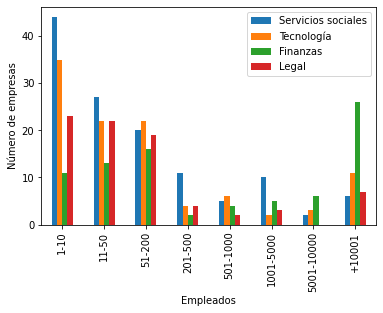

In [ ]:
xAxis=[]
xAxis.append("1-10")
xAxis.append("11-50")
xAxis.append("51-200")
xAxis.append("201-500")
xAxis.append("501-1000")
xAxis.append("1001-5000")
xAxis.append("5001-10000")
xAxis.append("+10001")

yAxisSocial=[]
yAxisTechnology=[]
yAxisFinance=[]
yAxisLegal=[]

yAxisSocial.append(df[(df.company_category == "Social services") & (df.Employees <= 10)].index.size)
yAxisSocial.append(df[(df.company_category == "Social services") & (df.Employees > 10) & (df.Employees <= 50)].index.size)
yAxisSocial.append(df[(df.company_category == "Social services") & (df.Employees > 50) & (df.Employees <= 200)].index.size)
yAxisSocial.append(df[(df.company_category == "Social services") & (df.Employees > 200) & (df.Employees <= 500)].index.size)
yAxisSocial.append(df[(df.company_category == "Social services") & (df.Employees > 500) & (df.Employees <= 1000)].index.size)
yAxisSocial.append(df[(df.company_category == "Social services") & (df.Employees > 1000) & (df.Employees <= 5000)].index.size)
yAxisSocial.append(df[(df.company_category == "Social services") & (df.Employees > 5000) & (df.Employees <= 10000)].index.size)
yAxisSocial.append(df[(df.company_category == "Social services") & (df.Employees > 10000)].index.size)

yAxisTechnology.append(df[(df.company_category == "Technology") & (df.Employees <= 10)].index.size)
yAxisTechnology.append(df[(df.company_category == "Technology") & (df.Employees > 10) & (df.Employees <= 50)].index.size)
yAxisTechnology.append(df[(df.company_category == "Technology") & (df.Employees > 50) & (df.Employees <= 200)].index.size)
yAxisTechnology.append(df[(df.company_category == "Technology") & (df.Employees > 200) & (df.Employees <= 500)].index.size)
yAxisTechnology.append(df[(df.company_category == "Technology") & (df.Employees > 500) & (df.Employees <= 1000)].index.size)
yAxisTechnology.append(df[(df.company_category == "Technology") & (df.Employees > 1000) & (df.Employees <= 5000)].index.size)
yAxisTechnology.append(df[(df.company_category == "Technology") & (df.Employees > 5000) & (df.Employees <= 10000)].index.size)
yAxisTechnology.append(df[(df.company_category == "Technology") & (df.Employees > 10000)].index.size)

yAxisFinance.append(df[(df.company_category == "Finance") & (df.Employees <= 10)].index.size)
yAxisFinance.append(df[(df.company_category == "Finance") & (df.Employees > 10) & (df.Employees <= 50)].index.size)
yAxisFinance.append(df[(df.company_category == "Finance") & (df.Employees > 50) & (df.Employees <= 200)].index.size)
yAxisFinance.append(df[(df.company_category == "Finance") & (df.Employees > 200) & (df.Employees <= 500)].index.size)
yAxisFinance.append(df[(df.company_category == "Finance") & (df.Employees > 500) & (df.Employees <= 1000)].index.size)
yAxisFinance.append(df[(df.company_category == "Finance") & (df.Employees > 1000) & (df.Employees <= 5000)].index.size)
yAxisFinance.append(df[(df.company_category == "Finance") & (df.Employees > 5000) & (df.Employees <= 10000)].index.size)
yAxisFinance.append(df[(df.company_category == "Finance") & (df.Employees > 10000)].index.size)

yAxisLegal.append(df[(df.company_category == "Legal") & (df.Employees <= 10)].index.size)
yAxisLegal.append(df[(df.company_category == "Legal") & (df.Employees > 10) & (df.Employees <= 50)].index.size)
yAxisLegal.append(df[(df.company_category == "Legal") & (df.Employees > 50) & (df.Employees <= 200)].index.size)
yAxisLegal.append(df[(df.company_category == "Legal") & (df.Employees > 200) & (df.Employees <= 500)].index.size)
yAxisLegal.append(df[(df.company_category == "Legal") & (df.Employees > 500) & (df.Employees <= 1000)].index.size)
yAxisLegal.append(df[(df.company_category == "Legal") & (df.Employees > 1000) & (df.Employees <= 5000)].index.size)
yAxisLegal.append(df[(df.company_category == "Legal") & (df.Employees > 5000) & (df.Employees <= 10000)].index.size)
yAxisLegal.append(df[(df.company_category == "Legal") & (df.Employees > 10000)].index.size)

df2plot = pd.DataFrame({"Empleados":xAxis, "Servicios sociales":yAxisSocial, "Tecnología":yAxisTechnology, "Finanzas":yAxisFinance, "Legal":yAxisLegal})

df2plot.rename(columns={"company_category": "Sector"}, inplace=True)

ax = df2plot.plot(x="Empleados", y=[ "Servicios sociales", "Tecnología", "Finanzas", "Legal"], kind="bar", )
ax.set_ylabel("Número de empresas")


Distribución del número de empleados por tamaño y sector.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 494
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name_id                393 non-null    object 
 1   city                           393 non-null    object 
 2   state                          393 non-null    object 
 3   Employees                      393 non-null    int64  
 4   Office Size (m2)               393 non-null    float64
 5   Metros cuadrados por empleado  393 non-null    float64
 6   company_type                   393 non-null    object 
 7   Sector                         393 non-null    object 
 8   meetingRoomsArea               393 non-null    float64
 9   receptionArea                  393 non-null    float64
 10  cantineArea                    393 non-null    float64
 11  corridorsArea                  393 non-null    float64
 12  archiveArea                    393 non-null    int

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

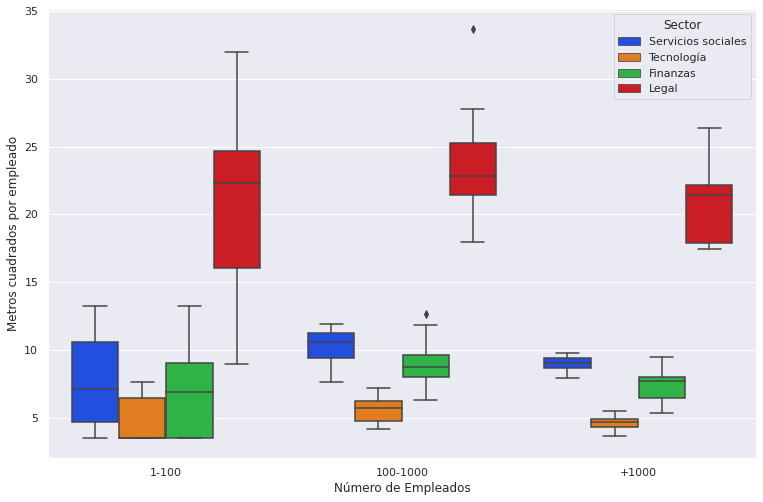

In [ ]:
df2plot = df[(df.company_category == "Social services") | (df.company_category == "Technology") | (df.company_category == "Finance") | (df.company_category == "Legal")]

df2plot["Número de Empleados"] = df2plot["Employees"] 
df2plot["Número de Empleados"][df2plot["Employees"] <= 100] = "1-100"
df2plot["Número de Empleados"][(df2plot["Employees"] > 100) & (df2plot["Employees"] <= 1000)] = "100-1000"
df2plot["Número de Empleados"][(df2plot["Employees"] > 1000)] = "+1000"

df2plot.rename(columns={"Sqm per worker":"Metros cuadrados por empleado" ,"company_category": "Sector"}, inplace=True)

df2plot["Sector"][df2plot["Sector"] == "Social services"] = "Servicios sociales"
df2plot["Sector"][df2plot["Sector"] == "Technology"] = "Tecnología"
df2plot["Sector"][df2plot["Sector"] == "Finance"] = "Finanzas"

df2plot.info()
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.boxplot(y="Metros cuadrados por empleado", x="Número de Empleados", 
            data=df2plot, 
            palette="bright",
            hue="Sector",
            hue_order=["Servicios sociales", "Tecnología", "Finanzas", "Legal"])


Eliminar los outliers que se muestran.

In [ ]:
#df.loc[(df.company_category == "Legal") & (df.Employees > 100) & (df.Employees < 1000), "Sqm per worker"]
df.loc[(df.company_category == "Finance") & (df.Employees > 100) & (df.Employees < 1000), "Sqm per worker"]

33      8.188785
52      9.151753
61      8.212457
98      7.757784
113    10.286173
151     9.306125
169     9.941114
223     8.381787
245     7.949874
248     9.322383
254     6.330018
255     7.647424
261     8.004276
309     6.891482
322     8.312777
382    12.631405
446    11.362980
459    11.830870
473     9.008410
485     9.474960
Name: Sqm per worker, dtype: float64

In [ ]:
df.drop([382,462], axis=0, inplace=True)
df.drop([459], axis=0, inplace=True)
df.drop([446], axis=0, inplace=True)

Mostrar distribución de las empresas por estados

In [ ]:
!pip install chart_studio
from chart_studio import plotly as py
import plotly.graph_objects as go

     |████████████████████████████████| 71kB 2.6MB/s 


In [ ]:
df2 = df["state"].value_counts().rename_axis('state').reset_index(name='numCompanies')
df2.head

<bound method NDFrame.head of    state  numCompanies
0     CA           122
1     NY            97
2     MA            39
3     IL            24
4     DC            22
5     WA            22
6     VA            20
7     TX            16
8     NJ            14
9     PA            11
10    MD            11
11    CO             9
12    CT             8
13    GA             6
14    IN             6
15    OH             6
16    MO             6
17    FL             6
18    NC             5
19    MI             4
20    MN             3
21    AZ             3
22    NH             2
23    ME             2
24    WI             2
25    OR             2
26    TN             2
27    UT             2
28    NE             1
29    RI             1
30    IA             1
31    NV             1
32    KY             1
33    KA             1
34    VT             1
35    AR             1
36    MT             1
37    OK             1
38    AL             1>

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=df2['state'],
    z = df2['numCompanies'],
    locationmode = 'USA-states',
    colorscale = 'Greens',
    colorbar_title = "Número de empresas",
))

fig.update_layout(
    title_text = 'Número de empresas por estado',
    geo_scope='usa',
)

fig.show()

Añadir el porcentaje máximo de empleados trabajando presencialmente. El valor es calculado según las reglas descritas.

In [ ]:
df.head()

,company_name_id,city,state,Employees,Office Size (m2),Sqm per worker,company_type,company_category,meetingRoomsArea,receptionArea,cantineArea,corridorsArea,archiveArea
0,3-round-stones-inc,Washington,DC,8,103.40,3.602500,Private,Technology,27.6,9.3,17.0,20.680,0
1,48-factoring-inc,Philadelphia,PA,99,2007.06,13.232808,Private,Finance,138.0,18.6,139.0,401.412,0
2,5psolutions,Fairfax,VA,4,56.13,3.500000,Private,Technology,27.6,9.3,12.0,11.226,0
3,abt-associates,Cambridge,MA,2102,46844.28,11.281777,Private,Biotech and science,5823.6,204.6,2928.5,14053.284,120
4,accela,San Ramon,CA,600,23310.05,22.809058,Private,Legal,1656.0,111.6,834.0,6993.015,30


In [ ]:
def minimumLateralSeparation():
  return 2.5 + 0.7

def workStationPercentaje(row): 
  lateralSeparation = row["Sqm per worker"] / max(1.9, math.sqrt(row["Sqm per worker"] / 1.1))
  return min(1.0,  1.0 / math.ceil(minimumLateralSeparation() / lateralSeparation) )
  
def extraMeetingRoomPositions(row, workStationPercentaje):
  numUnusedMeetingRooms = math.ceil(row["meetingRoomsArea"] / (4.6 + 2.3 * 10.) * (1.0 - workStationPercentaje)) / 2
  lateralSeparation = (2.3 / 1.9)
  peoplePerRoom = math.floor(10 / math.ceil(minimumLateralSeparation() / lateralSeparation) )
  return numUnusedMeetingRooms * peoplePerRoom

def maximumPercentageCantine():
  return .76

In [ ]:
workersInOffice = []

for index, row in df.iterrows():
  workPlacePercentage = workStationPercentaje(row)
  extraPositions = extraMeetingRoomPositions(row, workPlacePercentage)

  workPlaceLimit = min(max(min(2, row["Employees"]), math.floor(row["Employees"] * workPlacePercentage) + extraPositions), row["Employees"])
  cantineLimit = max(2, math.floor(row["Employees"] * maximumPercentageCantine()))

  numberofPresentialWorkers = min(workPlaceLimit, cantineLimit)
  workersInOffice.append(numberofPresentialWorkers)

df["workers_in_office"] = workersInOffice
df["workers_in_office_percentage"] = df["workers_in_office"] / df["Employees"]


## Minería de datos




Separación del dataset en dataset de entrenamiento y validación 

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

seed = 18

###1) Regresión Lineal

####  a) Regresión Lineal Simple

Definir y entrenar el modelo

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
testSize = 0.10
train_df, test_df = train_test_split(df, test_size = testSize, random_state = seed)
#train_df, test_df = train_test_split(df, test_size = testSize, random_state = seed, stratify = df["company_type"] + "_" + df["company_category"] )
#train_df, test_df = train_test_split(df, test_size = testSize, random_state = seed, stratify = df["company_category"] )
train_df.reset_index(drop = True, inplace = True)

train_df.rename(columns={"Office Size (m2)": "office_size", "Sqm per worker": "sqm_per_worker"}, inplace=True)
test_df.rename(columns={"Office Size (m2)": "office_size", "Sqm per worker": "sqm_per_worker"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
formulaParameters = "~ Employees + office_size + sqm_per_worker + company_type + company_category"

predictedValues = ["workers_in_office", "workers_in_office_percentage"]

In [ ]:
model = []
i = 0

for predictedValue in predictedValues:
  model.append(sm.formula.ols( formula = predictedValue + formulaParameters, data = train_df ).fit())
  
  # Summary
  print("Predicted value : %s" % predictedValue)
  print(model[i].summary())

  i += 1

Predicted value : workers_in_office
                            OLS Regression Results                            
Dep. Variable:      workers_in_office   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     7770.
Date:                Sun, 20 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:12:01   Log-Likelihood:                -3134.8
No. Observations:                 434   AIC:                             6292.
Df Residuals:                     423   BIC:                             6336.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Testear el modelo

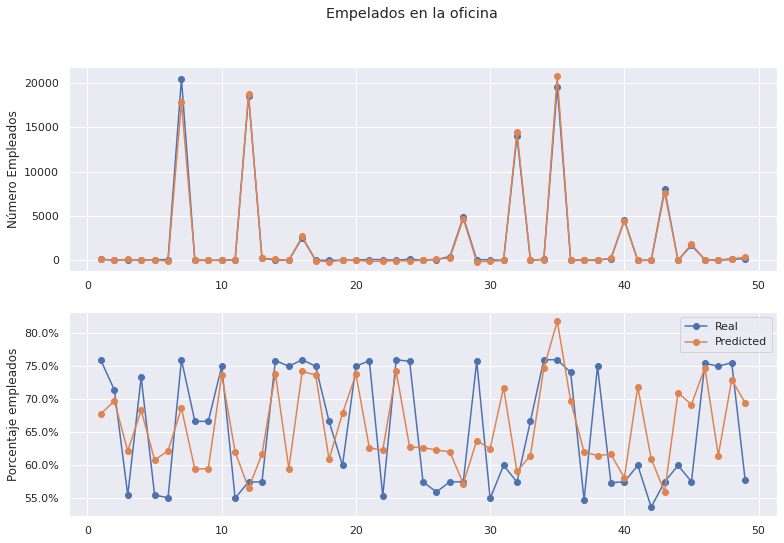

In [ ]:
fig = plt.figure()
fig.suptitle("Empelados en la oficina")
i = 0
plotLabels = ["Número Empleados", "Porcentaje empleados"]

for predictedValue in predictedValues:
  yPred = model[i].predict(test_df)

  # Plotear resultados
  ax = fig.add_subplot(2, 1, i+1)
 
  if (i == 1):
    ax.plot(range(1, len(yPred)+1), test_df[predictedValue] * 100,  marker='o', label="Real")
    yPred = yPred * 100

  else:
    ax.plot(range(1, len(yPred)+1), test_df[predictedValue],  marker='o', label="Real")
  
  ax.plot(range(1, len(yPred)+1), yPred,  marker='o', label="Predicted")
  ax.set(ylabel=plotLabels[i])

  i += 1

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.show() 


#### b) Normalizar los datos y repetir el modelo

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normTrain_df = train_df.copy()
normTest_df = test_df.copy()
colNames = ["Employees", "office_size", "sqm_per_worker"]

normTrain_df["Employees"] = np.log10(normTrain_df["Employees"])
normTrain_df["office_size"] = np.log10(normTrain_df["office_size"])
normTest_df["Employees"] = np.log10(normTest_df["Employees"])
normTest_df["office_size"] = np.log10(normTest_df["office_size"])

normalizer = MinMaxScaler().fit(normTrain_df[colNames])

normTrain_df[colNames] = normalizer.transform(normTrain_df[colNames])
normTest_df[colNames] = normalizer.transform(normTest_df[colNames])

In [ ]:
formulaParameters = "~ Employees + office_size + sqm_per_worker + company_category"

In [ ]:
model = sm.formula.ols( formula = "workers_in_office_percentage" + formulaParameters, data = normTrain_df ).fit()

# Coeficientes
print("Predicted value : %s" % "workers_in_office_percentage")
print(model.summary())


Predicted value : workers_in_office_percentage
                                 OLS Regression Results                                 
Dep. Variable:     workers_in_office_percentage   R-squared:                       0.395
Model:                                      OLS   Adj. R-squared:                  0.383
Method:                           Least Squares   F-statistic:                     34.66
Date:                          Sun, 20 Jun 2021   Prob (F-statistic):           4.63e-42
Time:                                  12:12:19   Log-Likelihood:                 533.35
No. Observations:                           434   AIC:                            -1049.
Df Residuals:                               425   BIC:                            -1012.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                                          coef    std err      

Testear el modelo

RMS :  7.016294709821189


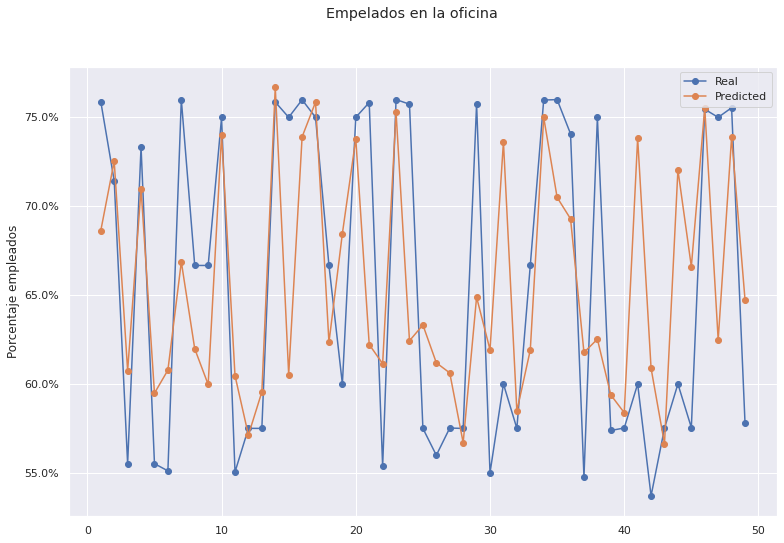

In [ ]:
fig = plt.figure()
fig.suptitle("Empelados en la oficina")
plotLabels = "Porcentaje empleados"

yPred = model.predict(normTest_df)

# Plotear resultados
ax = fig.add_subplot(1, 1, 1)
 
ax.plot(range(1, len(yPred)+1), normTest_df["workers_in_office_percentage"]*100,  marker='o', label="Real")
ax.plot(range(1, len(yPred)+1), yPred*100,  marker='o', label="Predicted")
ax.set(ylabel=plotLabels)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
rms = mean_squared_error(yPred, normTest_df[predictedValue], squared = False) * 100

print("RMS : ", rms)

plt.legend()
plt.show() 

In [ ]:
np.max(normTest_df["workers_in_office_percentage"]*100) - np.min(normTest_df["workers_in_office_percentage"]*100)

22.29629629629629

#### c) Comprobar porcentajes de empresas por categoría.

In [ ]:
df["company_category"].value_counts()
#train_df["company_category"].value_counts()


Social services        125
Technology             105
Finance                 80
Legal                   79
Biotech and science     66
Engineering             28
Name: company_category, dtype: int64

#### d) Regresión Lineal compleja
Definir y entrenar el modelo

In [ ]:
#formulaParameters = "~ Employees * office_size * sqm_per_worker + C(company_category) + np.square(Employees) * np.square(office_size) * np.square(sqm_per_worker)" # Necesita el dataframe sin codificar
formulaParameters = "~ Employees * office_size * sqm_per_worker - office_size - Employees:office_size - office_size:sqm_per_worker +\
                     np.square(Employees) * np.square(office_size) * np.square(sqm_per_worker) - np.square(office_size):np.square(sqm_per_worker) +\
                     category_Engineering + category_social_services"

predictedValue = "workers_in_office_percentage"


formulaParameters = "~ Employees * office_size * sqm_per_worker - office_size - Employees:office_size - office_size:sqm_per_worker +\
                     np.square(Employees) * np.square(office_size) * np.square(sqm_per_worker) - np.square(office_size):np.square(sqm_per_worker) +\
                     np.log(Employees + 1) * np.log(office_size + 1) * np.log(sqm_per_worker + 1) - np.log(Employees + 1):np.log(sqm_per_worker + 1) +\
                     category_Engineering + category_social_services"


In [ ]:
codedNormTrain_df = pd.get_dummies(normTrain_df, columns=["company_category"], prefix=["category"])
codedNormTest_df = pd.get_dummies(normTest_df, columns=["company_category"], prefix=["category"])

codedNormTrain_df.rename(columns={"Office Size (m2)":"office_size", "Sqm per worker":"sqm_per_worker", 
                              "category_Biotech and science":"category_biotech_and_science", "category_Social services":"category_social_services"}, inplace=True)
codedNormTest_df.rename(columns={"Office Size (m2)":"office_size", "Sqm per worker":"sqm_per_worker", 
                              "category_Biotech and science":"category_biotech_and_science", "category_Social services":"category_social_services"}, inplace=True)

In [ ]:
#model = sm.formula.ols( formula = predictedValue + formulaParameters, data = normTrain_df ).fit()
model = sm.formula.ols( formula = predictedValue + formulaParameters, data = codedNormTrain_df ).fit()
  
# Summary
print("Predicted value : %s" % predictedValue)
print(model.summary())


Predicted value : workers_in_office_percentage
                                 OLS Regression Results                                 
Dep. Variable:     workers_in_office_percentage   R-squared:                       0.704
Model:                                      OLS   Adj. R-squared:                  0.691
Method:                           Least Squares   F-statistic:                     54.77
Date:                          Sun, 20 Jun 2021   Prob (F-statistic):           1.45e-97
Time:                                  12:16:26   Log-Likelihood:                 688.35
No. Observations:                           434   AIC:                            -1339.
Df Residuals:                               415   BIC:                            -1261.
Df Model:                                    18                                         
Covariance Type:                      nonrobust                                         
                                                               

RMS :  5.361086630383035
MAE :  4.255700220430299
Max absolute error :  11.091748689674342


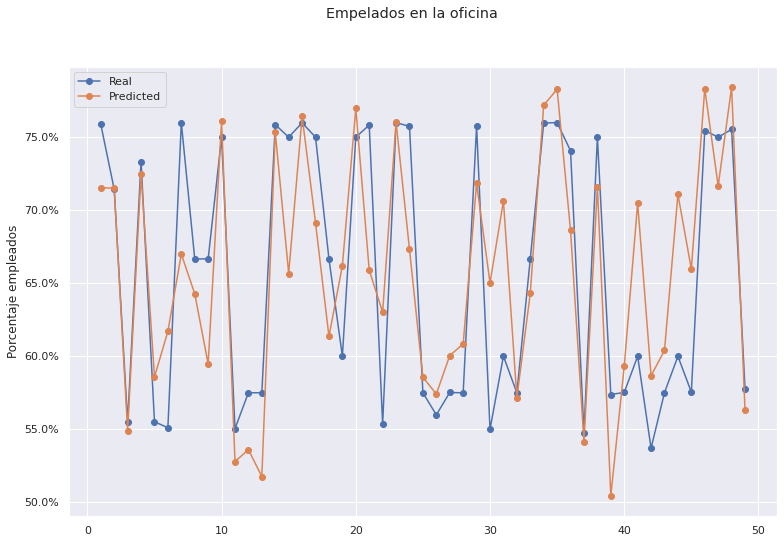

In [ ]:
fig = plt.figure()
fig.suptitle("Empelados en la oficina")
plotLabels = "Porcentaje empleados"

#yPred = model.predict(normTest_df)
yPred = model.predict(codedNormTest_df)


# Plotear resultados
ax = fig.add_subplot(1, 1, 1)
 
#ax.plot(range(1, len(yPred)+1), normTest_df["workers_in_office_percentage"]*100,  marker='o', label="Real")
ax.plot(range(1, len(yPred)+1), codedNormTest_df["workers_in_office_percentage"]*100,  marker='o', label="Real")
ax.plot(range(1, len(yPred)+1), yPred*100,  marker='o', label="Predicted")
ax.set(ylabel=plotLabels)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

#rms = mean_squared_error(yPred, normTest_df[predictedValue], squared = False) * 100
rms = mean_squared_error(yPred, codedNormTest_df[predictedValue], squared = False) * 100
mae = mean_absolute_error(yPred, codedNormTest_df[predictedValue]) * 100
maxError = max(yPred - codedNormTest_df[predictedValue]) * 100

print("RMS : ", rms)
print("MAE : ", mae)
print("Max absolute error : ", maxError)

plt.legend()
plt.show() 

#### Añadir número de salas de reuniones


###2) Modelo KNN


In [ ]:
from sklearn import neighbors

Convertir Strings en valores numéricos

Se usa el One-Hot encoding para el Sector y tipo de empresa


In [ ]:
encoded_df = pd.get_dummies(df, columns=["company_category"], prefix=["category"])

encoded_df.rename(columns={"Office Size (m2)":"office_size", "Sqm per worker":"sqm_per_worker", 
                           "category_Biotech and science":"category_biotech_and_science", "category_Social services":"category_social_services"}, inplace=True)

In [ ]:
testSize = 0.10
train_df, test_df = train_test_split(encoded_df, test_size = testSize, random_state = seed)
train_df.reset_index(drop = True, inplace = True)

# El seleccionar el número de casos a probar se hace de esta manera para tener un porcentaje similar al empleado para dividir el dataframe entre entrenamiento y test.
kf = KFold(n_splits = math.floor(1. / testSize), shuffle = True, random_state = seed)


In [ ]:
# droppedColumns = ["company_name_id", "city", "state", "meetingRoomsArea", "receptionArea", 
#                   "cantineArea", "corridorsArea", "archiveArea", 
#                   "company_type", "workers_in_office", "workers_in_office_percentage"]

Definir y entrenar el modelo. DEPRECATED (Only with normalized data)

In [ ]:
# fig, (ax1, ax2) = plt.subplots(2, sharex = True)
# fig.suptitle("Resultados del modelo KNN")

# # Comprobar con pesos uniformes o como inverso de la distancia
# for i, weights in enumerate(["uniform", "distance"]):
#   scoreMean = []
#   scoreSTD = []


#   # Se ejecutan varios modelos con distintos valores de N_neighbors para escoger el que de mejores resultados. El rango se situa entre 1 y 10 al no tener un número enorme de puntos.
#   for nNeighbors in range(1,20):
#     knn = neighbors.KNeighborsRegressor(nNeighbors, weights=weights)
#     # verificar cada uno de los modelos con validación cruzada.
#     cv_scores = -cross_val_score(knn, X = train_df.drop(droppedColumns, axis=1),
#                                  y = train_df["workers_in_office_percentage"],
#                                  cv = kf, scoring = "neg_mean_absolute_error")

#     scoreMean.append(np.mean(cv_scores))
#     scoreSTD.append(np.std(cv_scores))
      
#     # Añadir valores a los plots de MAE. Se muestran dos subplots uno con el valor medio del MAE obtenido entre todos los folds y el otro la desviación de dicho valor entre los folds de un mismo caso.
#   ax1.plot(range(1, len(scoreMean)+1), scoreMean,  marker='o', label=weights)
#   ax1.set(ylabel="MAE")

#   ax2.plot(range(1, len(scoreSTD)+1), scoreSTD,  marker='o', label=weights)
#   ax2.set(xlabel="Number of neighbors", ylabel="MAE STD")

#   # Mostrar el valor con menor MAE.
#   print ("Min MAE Value " +  weights + " : " +  str(min(scoreMean)) + ". Associated STD : " + str(scoreSTD[np.argmin(scoreMean)]) + " (" + str(np.argmin(scoreMean) + 1) + ")")

# plt.legend()
# plt.show() 

Definir y entrenar el modelo estandarizado. DEPRECATED  (Only with normalized data)

In [ ]:
# fig, (ax1, ax2) = plt.subplots(2, sharex = True)
# fig.suptitle("Resultados del modelo KNN")

# # Comprobar con pesos uniformes o como inverso de la distancia
# for i, weights in enumerate(["uniform", "distance"]):
#   scoreMean = []
#   scoreSTD = []

#   # Se ejecutan varios modelos con distintos valores de N_neighbors para escoger el que de mejores resultados. El rango se situa entre 1 y 10 al no tener un número enorme de puntos.
#   for nNeighbors in range(1,20):
#     foldAccuracy = []
#     knn = neighbors.KNeighborsRegressor(nNeighbors, weights=weights)
#     # verificar cada uno de los modelos con validación cruzada.
#     cv_scores = -cross_val_score(knn, X = scaledTrain_df.drop(droppedColumns, axis=1),
#                                  y = scaledTrain_df["workers_in_office"],
#                                  cv = kf, scoring = "neg_mean_absolute_error")

#     scoreMean.append(np.mean(cv_scores))
#     scoreSTD.append(np.std(cv_scores))
      
#   # Añadir valores a los plots de MAE. Se muestran dos subplots uno con el valor medio del MAE obtenido entre todos los folds y el otro la desviación de dicho valor entre los folds de un mismo caso.
#   ax1.plot(range(1, len(scoreMean)+1), scoreMean,  marker='o', label=weights)
#   ax1.set(ylabel="MAE")

#   ax2.plot(range(1, len(scoreSTD)+1), scoreSTD,  marker='o', label=weights)
#   ax2.set(xlabel="Number of neighbors", ylabel="MAE STD")

#   # Mostrar el valor con menor MAE.
#   print ("Min MAE Value " +  weights + " : " +  str(min(scoreMean)) + ". Associated STD : " + str(scoreSTD[np.argmin(scoreMean)]) + " (" + str(np.argmin(scoreMean) + 1) + ")")

# plt.legend()
# plt.show() 

Definir y entrenar el modelo normalizado

In [ ]:
normTrain_df = train_df.copy()
normTest_df = test_df.copy()
colNames = ["Employees", "office_size", "sqm_per_worker"]

normTrain_df["Employees"] = np.log10(normTrain_df["Employees"])
normTrain_df["office_size"] = np.log10(normTrain_df["office_size"])
normTest_df["Employees"] = np.log10(normTest_df["Employees"])
normTest_df["office_size"] = np.log10(normTest_df["office_size"])

normalizer = MinMaxScaler().fit(normTrain_df[colNames])

normTrain_df[colNames] = normalizer.transform(normTrain_df[colNames])
normTest_df[colNames] = normalizer.transform(normTest_df[colNames])

In [ ]:
droppedColumns = ["company_name_id", "city", "state", "company_type",
                  "meetingRoomsArea", "receptionArea", "cantineArea", "corridorsArea", "archiveArea",
                  "category_biotech_and_science", "category_Engineering", "category_Finance", "category_Legal", 
                  "category_social_services", "category_Technology",
#                  "sqm_per_worker",
                  "office_size",
                  "workers_in_office", "workers_in_office_percentage"]

Min MAE Value uniform : 1.3969801779533584. Associated STD : 0.5077693230226215 (1)
Min MAE Value distance : 1.3811111742462838. Associated STD : 0.44792221084907063 (3)


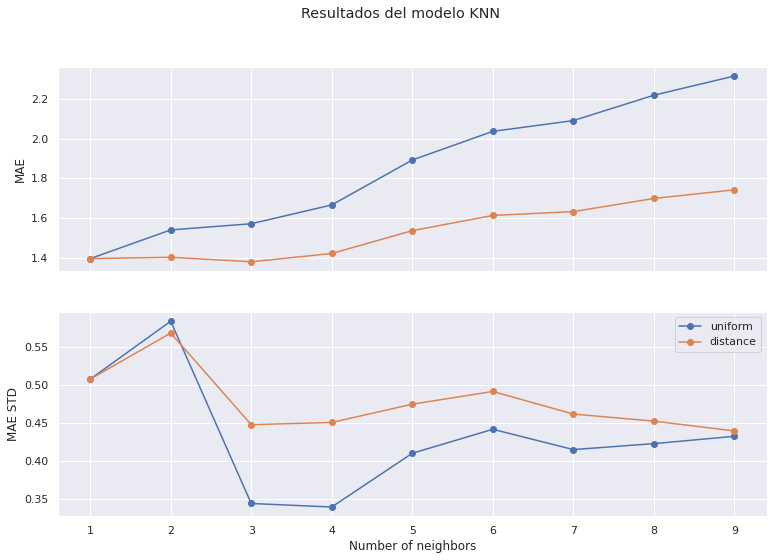

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True)
fig.suptitle("Resultados del modelo KNN")

# Comprobar con pesos uniformes o como inverso de la distancia
for i, weights in enumerate(["uniform", "distance"]):
  scoreMean = []
  scoreSTD = []

  # Se ejecutan varios modelos con distintos valores de N_neighbors para escoger el que de mejores resultados. El rango se situa entre 1 y 10 al no tener un número enorme de puntos.
  for nNeighbors in range(1,10):
    foldAccuracy = []
    knn = neighbors.KNeighborsRegressor(nNeighbors, weights=weights)
    # verificar cada uno de los modelos con validación cruzada.
    cv_scores = -cross_val_score(knn, X = normTrain_df.drop(droppedColumns, axis=1),
                                 y = normTrain_df["workers_in_office_percentage"],
                                 cv = kf, scoring = "neg_mean_absolute_error")

    scoreMean.append(np.mean(cv_scores) * 100)
    scoreSTD.append(np.std(cv_scores) * 100)
      
  # Añadir valores a los plots de MAE. Se muestran dos subplots uno con el valor medio del MAE obtenido entre todos los folds y el otro la desviación de dicho valor entre los folds de un mismo caso.
  ax1.plot(range(1, len(scoreMean)+1), scoreMean,  marker='o', label=weights)
  ax1.set(ylabel="MAE")

  ax2.plot(range(1, len(scoreSTD)+1), scoreSTD,  marker='o', label=weights)
  ax2.set(xlabel="Number of neighbors", ylabel="MAE STD")

  # Mostrar el valor con menor MAE.
  print ("Min MAE Value " +  weights + " : " +  str(min(scoreMean)) + ". Associated STD : " + str(scoreSTD[np.argmin(scoreMean)]) + " (" + str(np.argmin(scoreMean) + 1) + ")")

plt.legend()
plt.show() 

Crear y testear el modelo

RMS :  3.0090465767894687
MAE :  1.153600017743898
Max absolute error :  12.565286705677025


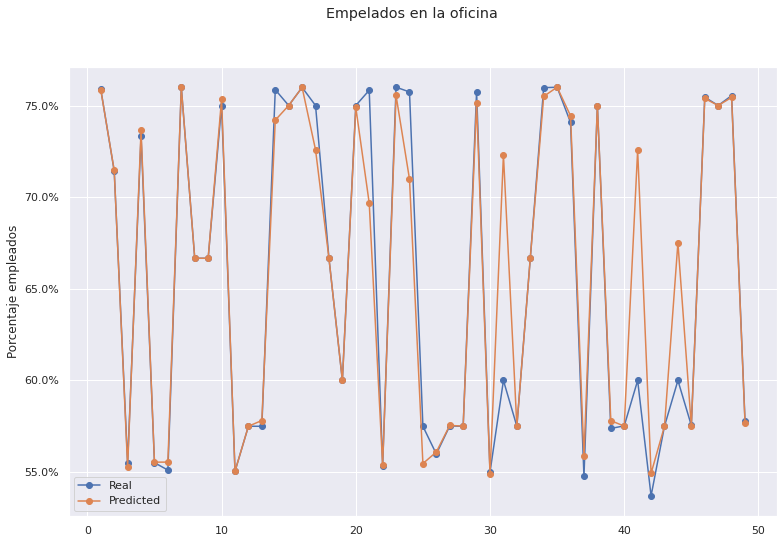

In [ ]:
fig = plt.figure()
fig.suptitle("Empelados en la oficina")
plotLabels = "Porcentaje empleados"

# Valores seleccionados
nNeighbors = 3
weights = 'distance'

knn = neighbors.KNeighborsRegressor(nNeighbors, weights=weights)
knn.fit( X = normTrain_df.drop(droppedColumns, axis=1), y = normTrain_df["workers_in_office_percentage"])

yPred = knn.predict(normTest_df.drop(droppedColumns, axis=1))

# Plotear resultados
ax = fig.add_subplot(1, 1, 1)
 
ax.plot(range(1, len(yPred)+1), normTest_df["workers_in_office_percentage"]*100,  marker='o', label="Real")
ax.plot(range(1, len(yPred)+1), yPred*100,  marker='o', label="Predicted")
ax.set(ylabel=plotLabels)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

rms = mean_squared_error(yPred, normTest_df[predictedValue], squared = False) * 100
mae = mean_absolute_error(yPred, normTest_df[predictedValue]) * 100
maxError = max(yPred - normTest_df[predictedValue]) * 100

print("RMS : ", rms)
print("MAE : ", mae)
print("Max absolute error : ", maxError)

plt.legend()
plt.show() 